In [13]:
import mido
import string
import numpy as np
import math
mid = mido.MidiFile('midi/beethoven_string_quartet_18_1_(c)harfesoft.mid', clip=True)
#mid.tracks
import glob
import pypianoroll
from music21 import converter, instrument, note, chord, stream
import matplotlib.pyplot as plt

In [14]:
def arry2mid(ary, tempo=200):
    # get the difference
    new_ary = np.concatenate([np.array([[0] * 128]), np.array(ary)], axis=0)
    changes = new_ary[1:] - new_ary[:-1]
    # create a midi file with an empty track
    mid_new = mido.MidiFile()
    track = mido.MidiTrack()
    mid_new.tracks.append(track)
    track.append(mido.MetaMessage('set_tempo', tempo=tempo, time=120))
    # add difference in the empty track
    last_time = 0
    for ch in changes:
        if set(ch) == {0}:  # no change
            last_time += 1
        else:
            on_notes = np.where(ch > 0)[0]
            on_notes_vol = ch[on_notes]
            off_notes = np.where(ch < 0)[0]
            first_ = True
            for n, v in zip(on_notes, on_notes_vol):
                new_time = last_time if first_ else 0
                track.append(mido.Message('note_on', note=n + 21, velocity=v, time=new_time))
                first_ = False
            for n in off_notes:
                new_time = last_time if first_ else 0
                track.append(mido.Message('note_off', note=n + 21, velocity=0, time=new_time))
                first_ = False
            last_time = 0
    return mid_new

In [17]:
def process_data():
    bar_set = []
    for file in glob.glob("midi/*.mid"):
        print(file)
        mt = pypianoroll.read(file)
        violin1 = mt.tracks[0].pianoroll
        violin2 = mt.tracks[1].pianoroll
        viola = mt.tracks[2].pianoroll
        cello = mt.tracks[3].pianoroll

        violin1 = violin1[:, 24:108]
        violin2 = violin2[:, 24:108]
        viola = viola[:, 24:108]
        cello = cello[:, 24:108]
        #print(violin1.dtype)
        n = int(violin1.shape[0]/384)

        while n>1:
            
            data = np.zeros((4, 96, 84, 4))
            for i in range(4):
                #print(violin1.shape, violin2.shape, viola.shape, cello.shape)
                data[i, :, :, 0] = violin1[i:i+96, :]
                data[i, :, :, 1] = violin2[i:i+96, :]
                data[i, :, :, 2] = viola[i:i+96, :]
                data[i, :, :, 3] = cello[i:i+96, :]

            violin1 = violin1[4*96:,:]
            violin2 = violin1[4*96:,:]
            viola = violin1[4*96:,:]
            cello = violin1[4*96:,:]
            n-=1
            bar_set.append(data)
        """
        while n>1:
            
            data = np.zeros((4, 96, 84, 4))
            for i in range(4):
                #print(violin1.shape, violin2.shape, viola.shape, cello.shape)
                data[0, :, :, i] = violin1[i:i+96, :]
                data[1, :, :, i] = violin2[i:i+96, :]
                data[2, :, :, i] = viola[i:i+96, :]
                data[3, :, :, i] = cello[i:i+96, :]

            violin1 = violin1[4*96:,:]
            violin2 = violin1[4*96:,:]
            viola = violin1[4*96:,:]
            cello = violin1[4*96:,:]
            n-=1
            bar_set.append(data)"""
            
    return bar_set

In [18]:
DataS = process_data()

midi/haydn_string_quartet_64_5_(c)harfesoft.mid
midi/mozart_string_quartet_387_2_(nc)mutopia.mid
midi/haydn_string_quartet_77_1_(c)harfesoft.mid


/Users/tyler/opt/anaconda3/lib/python3.8/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


midi/mozart_string_quartet_464_3_(nc)mutopia.mid
midi/string_quartet_73_5_(c)bachovich.mid
midi/mozart_string_quartet_465_1_(nc)mutopia (1).mid
midi/quartet_33_5_4_(c)simonetto.mid
midi/quartet_33_1_2_(c)simonetto.mid
midi/quartet_33_3_1_(c)simonetto.mid
midi/haydn_string_quartet_33_3_(c)harfesoft.mid
midi/mozart_string_quartet_458_1_(nc)mutopia.mid
midi/mozart_string-quartet_80_3_(nc)wittenburg.mid
midi/haydn_string_quartet_54_1_(c)harfesoft.mid
midi/string_quartet_73_1_(c)bachovich.mid
midi/piano_quintet_57_1b_(c)bachovich.mid
midi/haydn_string_quartet_20_3_(c)harfesoft.mid
midi/quartet_33_2_2_(c)simonetto.mid
midi/quartet_33_6_4_(c)simonetto.mid
midi/mozart_string_quartet_428_2_(nc)mutopia.mid
midi/brahms_string_quartet_51_1_(c)harfesoft.mid
midi/haydn_string_quartet_74_1_(c)harfesoft.mid
midi/beethoven_string_quartet_74_(c)harfesoft.mid
midi/mozart_string_quartet_464_4_(nc)mutopia.mid
midi/string_quartet_49_3_(c)bachovich.mid
midi/tchajkowski_string_quartet_30_(c)harfesoft.mid
midi

In [19]:
print(DataS[0].shape)
print(len(DataS))
RealD= np.zeros((len(DataS), 4, 96, 84, 4))
for i in range(len(DataS)):
    RealD[i] = DataS[i]


(4, 96, 84, 4)
10269


In [20]:
result_set=[]

In [23]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Conv2DTranspose, Concatenate, Activation
from keras.layers import BatchNormalization, Activation, ZeroPadding2D, ReLU
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv3D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv3DTranspose
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import sys

import numpy as np

class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 96
        self.img_cols = 84
        self.channels = 4
        self.img_shape = (4, self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 128

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()
        
        self.v1 = self.build_generator()
        self.v2 = self.build_generator()
        self.v3 = self.build_generator()
        self.v4 = self.build_generator()
        
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        
        
        img = self.generator(z)

        violin1 = self.v1(z)
        violin2 = self.v2(z)
        viola = self.v3(z)
        cello = self.v4(z)
        
        #tensor_shape = (None, 96, 84, 4)
        # = keras.Input(shape=((1,) + tensor_shape[1:]), dtype = 'int32')

        
        merged = Concatenate(axis=1)([violin1, violin2, viola, cello])
        print(merged.shape)
        
        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(merged)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        

        
    def build_generator(self):

        model = Sequential()

        model.add(Reshape([1,1,1,128], input_shape=(128,)))
        
        model.add(Conv3DTranspose(1024, (1,2,1), strides=(1,2,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(256, (1,2,1), strides=(1,2,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(256, (1,2,1), strides=(1,2,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(256, (1,2,1), strides=(1,4,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(128, (1,3,1), strides=(1,3,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(64, (1,1,7), strides=(1,1,7)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(4, (1,1,12), strides=(1,1,12)))
        model.add(BatchNormalization())
        model.add(Activation('tanh'))
        #model.add(Reshape([None,1,96,84,4]))
        
        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv3D(128, (2,1,1), strides=(1,1,1), input_shape=[4,96,84,4]))
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.77))
        
        model.add(Conv3D(128, (3,1,1), strides=(1,1,1)))
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.77))
        
        model.add(Conv3D(128, (1,1,12), strides=(1,1,12)))
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.77))
        
        model.add(Conv3D(128, (1,1,7), strides=(1,1,7)))
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.77))
        
        model.add(Conv3D(128, (1,2,1), strides=(1,2,1)))
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.77))
        
        model.add(Conv3D(128, (1,2,1), strides=(1,2,1)))
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.77))
        
        model.add(Conv3D(256, (1,4,1), strides=(1,2,1)))
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.77))
        
        model.add(Conv3D(512, (1,3,1), strides=(1,2,1)))
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.77))
        
        model.add(Dense(1024))
        model.add(LeakyReLU())
        model.add(Dense(1))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        #(X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        #X_train = X_train / 127.5 - 1.
        X_train = RealD
        print(X_train.shape)
        #X_train = np.expand_dims(X_train, axis=1)
        #print(X_train.shape)
        
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            vio1 = self.v1.predict(noise)
            vio2 = self.v2.predict(noise)
            vio3 = self.v3.predict(noise)
            vio4 = self.v4.predict(noise)
            
            quartet = np.zeros((batch_size, 4, 96, 84, 4))
            #print("qwq")
            #print(quartet[:,2,:,:,:].shape)
            #print("qwq")
            quartet[:,0,:,:,:] = vio1[:,0,:,:,:]
            quartet[:,1,:,:,:] = vio2[:,0,:,:,:]
            quartet[:,2,:,:,:] = vio3[:,0,:,:,:]
            quartet[:,3,:,:,:] = vio4[:,0,:,:,:]
            
            #print(quartet.shape)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(quartet, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f] [d_real: %f, d_fake: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss, d_loss_real[0], d_loss_fake[0]))
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f] [d_real: %f, d_fake: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss, d_loss_real[0], d_loss_fake[0]))
            g_loss = self.combined.train_on_batch(noise, valid)

            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f] [d_real: %f, d_fake: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss, d_loss_real[0], d_loss_fake[0]))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                #self.save_imgs(epoch)
                noise = np.random.normal(0, 1, (5*5, self.latent_dim))
                #noise = np.random.normal(0, 1, (r * c, self.latent_dim))
                gen_imgs = self.generator.predict(noise)
                print(gen_imgs.shape)
                result_set.append(gen_imgs)
                if len(result_set) == 0:
                    print("qwqwqwqwqwq")
                

    #def save_imgs(self, epoch):
        
        #r, c = 5, 5
        #noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        #gen_imgs = self.generator.predict(noise)
        #print(gen_imgs.shape)

        # Rescale images 0 - 1
        #gen_imgs = 0.5 * gen_imgs + 0.5

        #fig, axs = plt.subplots(r, c)
        #cnt = 0
        #for i in range(r):
           # for j in range(c):
             #   axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
             #   axs[i,j].axis('off')
             #   cnt += 1
        #fig.savefig("image/mnist_%d.png" % epoch)
        #plt.close()



In [24]:



if __name__ == '__main__':
    dcgan = DCGAN()
    dcgan.train(epochs=40, batch_size=100, save_interval=4)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_8 (Conv3D)            (None, 3, 96, 84, 128)    1152      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 3, 96, 84, 128)    0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 96, 84, 128)    0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 1, 96, 84, 128)    49280     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 1, 96, 84, 128)    0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 96, 84, 128)    0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 1, 96, 7, 128)    

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1, 1, 1, 128)      0         
_________________________________________________________________
conv3d_transpose_15 (Conv3DT (None, 1, 2, 1, 1024)     263168    
_________________________________________________________________
batch_normalization_15 (Batc (None, 1, 2, 1, 1024)     4096      
_________________________________________________________________
re_lu_12 (ReLU)              (None, 1, 2, 1, 1024)     0         
_________________________________________________________________
conv3d_transpose_16 (Conv3DT (None, 1, 4, 1, 256)      524544    
_________________________________________________________________
batch_normalization_16 (Batc (None, 1, 4, 1, 256)      1024      
_________________________________________________________________
re_lu_13 (ReLU)              (None, 1, 4, 1, 256)     

(None, 4, 96, 84, 4)
(10269, 4, 96, 84, 4)
0 [D loss: 2.172399, acc.: 85.60%] [G loss: 4.280134] [d_real: 4.332381, d_fake: 0.012416]
0 [D loss: 2.172399, acc.: 85.60%] [G loss: 3.959847] [d_real: 4.332381, d_fake: 0.012416]
0 [D loss: 2.172399, acc.: 85.60%] [G loss: 3.609943] [d_real: 4.332381, d_fake: 0.012416]
(25, 1, 96, 84, 4)
1 [D loss: 2.378665, acc.: 83.40%] [G loss: 1.793993] [d_real: 4.742782, d_fake: 0.014548]
1 [D loss: 2.378665, acc.: 83.40%] [G loss: 1.500482] [d_real: 4.742782, d_fake: 0.014548]
1 [D loss: 2.378665, acc.: 83.40%] [G loss: 2.097866] [d_real: 4.742782, d_fake: 0.014548]
2 [D loss: 0.821514, acc.: 93.30%] [G loss: 0.347035] [d_real: 1.609380, d_fake: 0.033649]
2 [D loss: 0.821514, acc.: 93.30%] [G loss: 0.294162] [d_real: 1.609380, d_fake: 0.033649]


KeyboardInterrupt: 

In [652]:
print(len(result_set))

15


(25, 1, 96, 84, 4)
(96, 84)


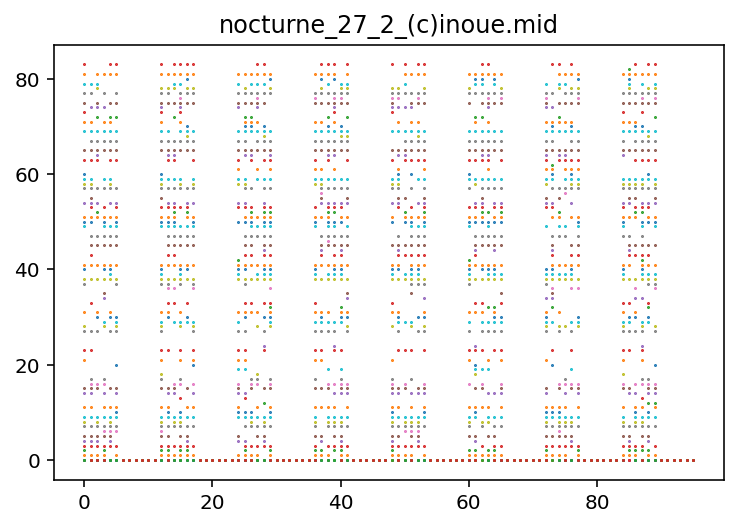

(96, 84)


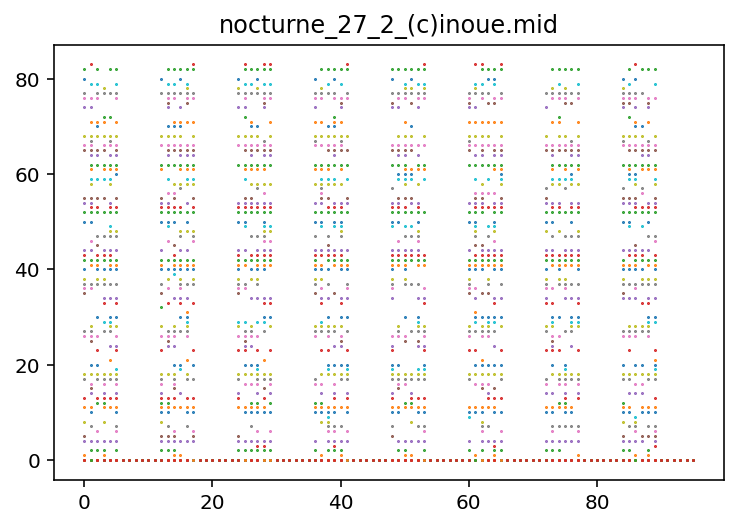

(96, 84)


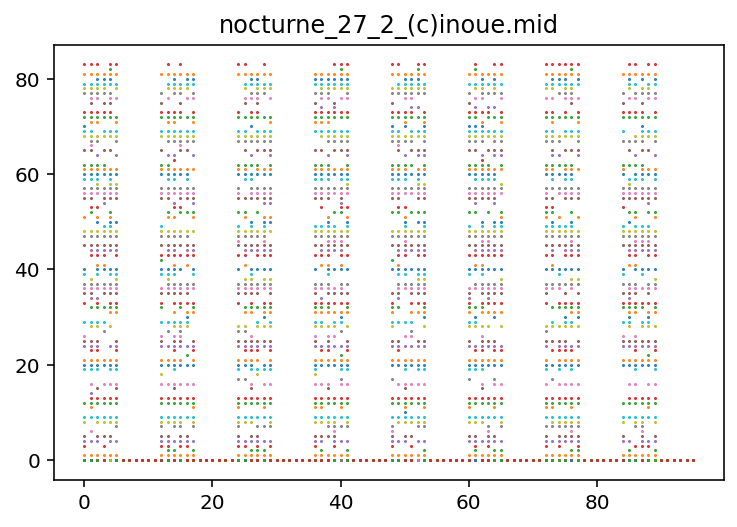

(96, 84)


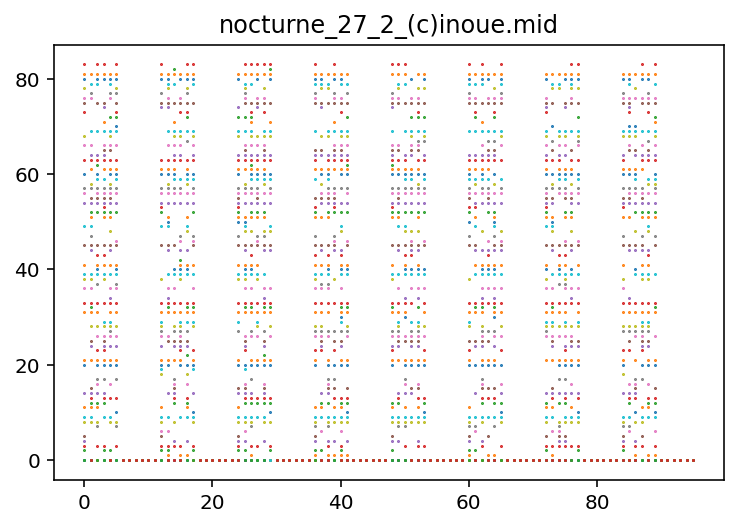

In [660]:
AAAA = result_set[14]
print(AAAA.shape)
AAAA = AAAA[0, 0, :, :, :]
for i in range(4):
    cur = AAAA[:,:,i]
    print(cur.shape)
    plt.plot(range(cur.shape[0]), np.multiply(np.where(cur>0, 1, 0), range(0, 84)), marker='.', markersize=1, linestyle='')
    plt.title("nocturne_27_2_(c)inoue.mid")
    plt.show()